In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "None"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import jax.numpy as jnp
from jax import random, jit, vmap
import numpy as onp

import matplotlib.pyplot as plt
import pickle
import itertools

In [3]:
import sys
sys.path.append("..")
%load_ext autoreload

In [6]:
%autoreload 2
from sequential import objective

I0000 00:00:1711570303.412483   15972 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
2024-03-27 16:11:43.469065: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:276] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
2024-03-27 16:11:44.775591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [47]:
methods = ['EI_leaky_alpha0.01_q1',
           'LCB_kappa1.0_q1',
           'LCB_kappa5.0_q1']
#methods = ['EI_leaky_alpha0.01_q1']
seeds = [0,1,2,3,4]

file_names = []
for (m, s) in itertools.product(methods, seeds):
    file_names.append('collected_datasets/dataset_85_' + m + '_seed' + str(s) + '.npz')
file_names

['collected_datasets/dataset_85_EI_leaky_alpha0.01_q1_seed0.npz',
 'collected_datasets/dataset_85_EI_leaky_alpha0.01_q1_seed1.npz',
 'collected_datasets/dataset_85_EI_leaky_alpha0.01_q1_seed2.npz',
 'collected_datasets/dataset_85_EI_leaky_alpha0.01_q1_seed3.npz',
 'collected_datasets/dataset_85_EI_leaky_alpha0.01_q1_seed4.npz',
 'collected_datasets/dataset_85_LCB_kappa1.0_q1_seed0.npz',
 'collected_datasets/dataset_85_LCB_kappa1.0_q1_seed1.npz',
 'collected_datasets/dataset_85_LCB_kappa1.0_q1_seed2.npz',
 'collected_datasets/dataset_85_LCB_kappa1.0_q1_seed3.npz',
 'collected_datasets/dataset_85_LCB_kappa1.0_q1_seed4.npz',
 'collected_datasets/dataset_85_LCB_kappa5.0_q1_seed0.npz',
 'collected_datasets/dataset_85_LCB_kappa5.0_q1_seed1.npz',
 'collected_datasets/dataset_85_LCB_kappa5.0_q1_seed2.npz',
 'collected_datasets/dataset_85_LCB_kappa5.0_q1_seed3.npz',
 'collected_datasets/dataset_85_LCB_kappa5.0_q1_seed4.npz']

In [48]:
best_so_far = 0
for file_name in file_names:
    u, _, s, _ = pickle.load(open(file_name, "rb"))
    objs = vmap(objective)(s)
    if -objs.min() > best_so_far:
        best_so_far=-objs.min()
        idx_best = objs.argmin()
        u_best = u[idx_best]
        s_best = s[idx_best]
        best_method = file_name
print(f"Overall best is {best_so_far}")
print(f"Best u is {u_best}")
print('Best run is in '+best_method)

Overall best is 0.9989986419677734
Best u is [-0.06092383 -0.01682121  0.12113585 -0.02740337]
Best run is in collected_datasets/dataset_85_LCB_kappa1.0_q1_seed3.npz


In [49]:
u_best.shape, s_best.shape

((4,), (4096, 16))

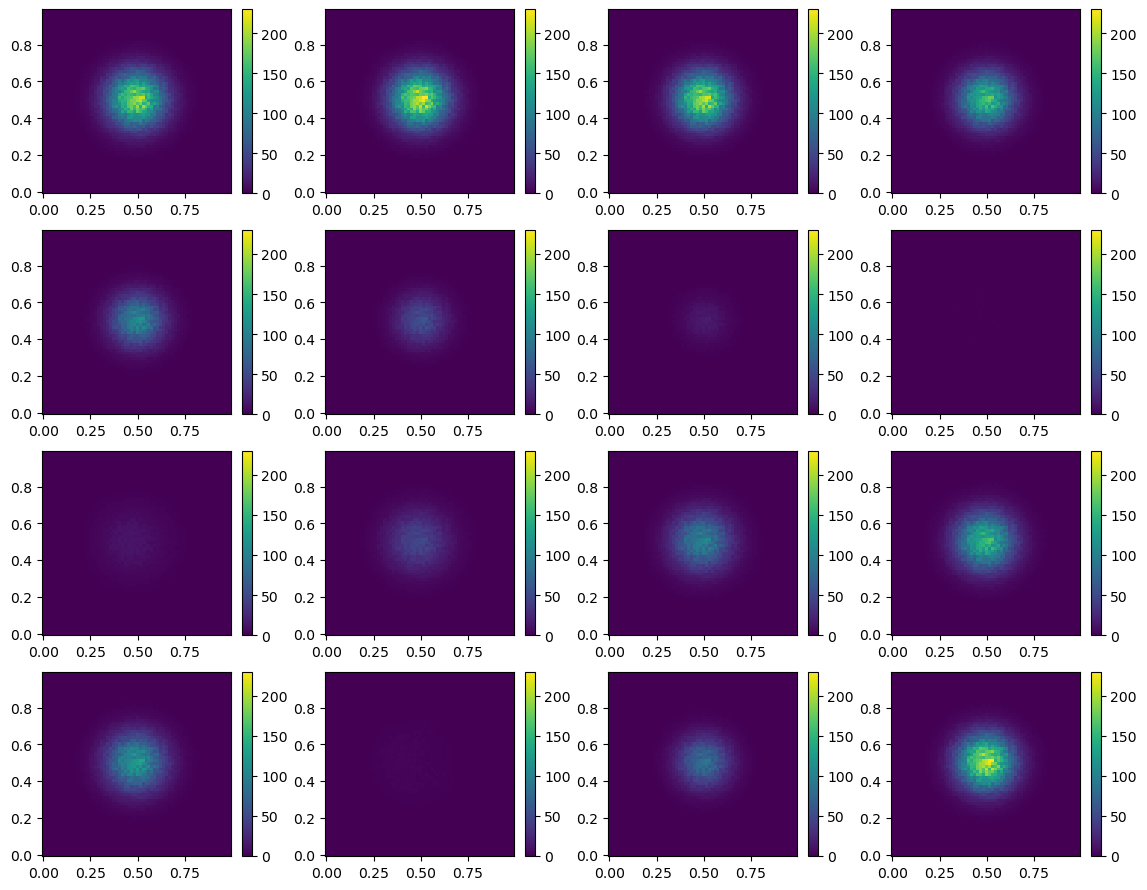

In [53]:
N_y = 64
xx, yy = jnp.meshgrid(jnp.arange(N_y)/N_y, jnp.arange(N_y)/N_y) # shapes (N_y,N_y) and (N_y,N_y)


plt.figure(figsize=(14, 11))

vmin = s_best.min()
vmax = s_best.max()
for i in range(16):
    num = int('44'+str(i+1))
    plt.subplot(4,4,i+1)
    plt.pcolor(xx, yy, s_best.reshape((N_y,N_y,16))[:,:,i], vmin=vmin, vmax=vmax)
    plt.colorbar()
plt.savefig('best_interferometer.png', dpi=250)
plt.show()